Accuracy: 95.56%


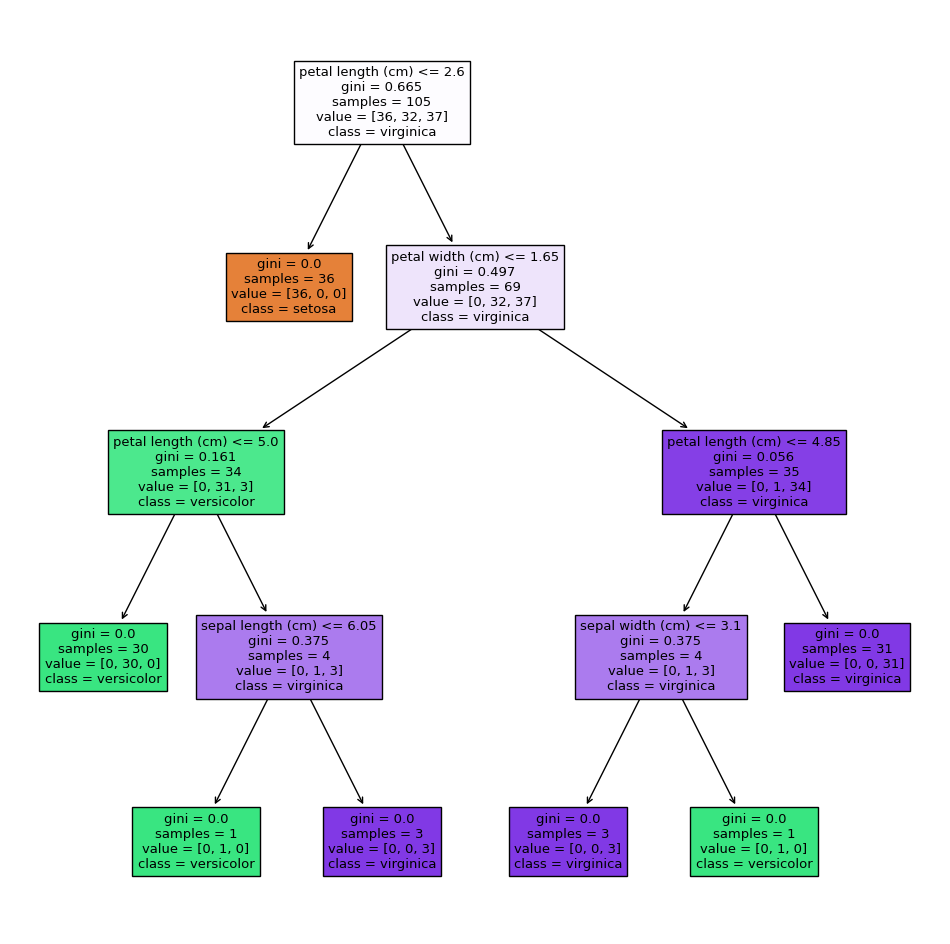

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
iris=load_iris()
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print (f'Accuracy: {accuracy*100:.2f}%')
plt.figure(figsize=(12,12))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

Error at epoch 0: 0.4993115461156098
Error at epoch 1000: 0.49923559684576224
Error at epoch 2000: 0.4900624695898629
Error at epoch 3000: 0.4317710151541003
Error at epoch 4000: 0.3820561780275187
Error at epoch 5000: 0.354168653833565
Error at epoch 6000: 0.3367423008561655
Error at epoch 7000: 0.32363789204537885
Error at epoch 8000: 0.31337297216725746
Error at epoch 9000: 0.30520986104061626


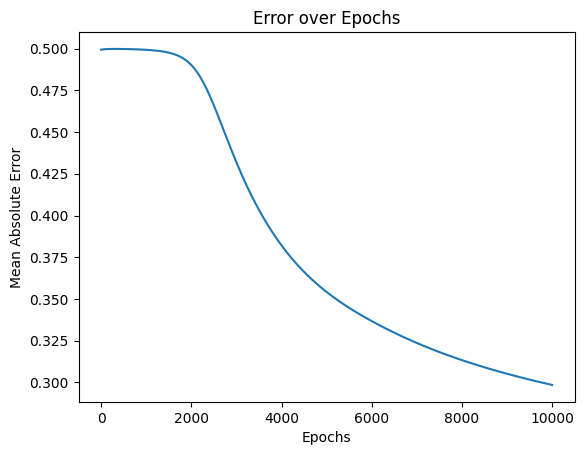

Output after training:
[[0.11601492]
 [0.74954116]
 [0.75229328]
 [0.57996028]]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

np.random.seed(1)
weights_0 = 2 * np.random.random((2, 2)) - 1
weights_1 = 2 * np.random.random((2, 1)) - 1

learning_rate = 0.1
epochs = 10000
error_history = []

for epoch in range(epochs):
    layer_0 = inputs
    layer_1 = sigmoid(np.dot(layer_0, weights_0))
    layer_2 = sigmoid(np.dot(layer_1, weights_1))

    layer_2_error = outputs - layer_2
    error_history.append(np.mean(np.abs(layer_2_error)))

    if (epoch % 1000) == 0:
        print(f'Error at epoch {epoch}: {error_history[-1]}')

    layer_2_delta = layer_2_error * sigmoid_derivative(layer_2)
    layer_1_error = layer_2_delta.dot(weights_1.T)
    layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)

    weights_1 += layer_1.T.dot(layer_2_delta) * learning_rate
    weights_0 += layer_0.T.dot(layer_1_delta) * learning_rate

plt.plot(error_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Error over Epochs')
plt.show()

print('Output after training:')
print(layer_2)
